# Tasks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## P 10.1: Find an image dataset with at least 1000 images. Apply a convolutional neural network to classify the images and calculate all evaluation metrics. The quality of your solution and the accuracy your model produces will affect your mark. So, try to get the best accuracy possible (10%).

## NOTE: You should comment on your code and explain what each part of the code does.

In [2]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)  ####################
#I'm importing all the modules i will need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, KFold
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# Created a function to load the images and labels into a list
data_dir = "/content/drive/MyDrive/Rice_Image_Dataset"
classes = []

def load_data(data_dir):
  images = []
  labels = []
  for subfolder in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for filename in os.listdir(subfolder_path):
      file_path = os.path.join(subfolder_path, filename)
      images.append(file_path)
      labels.append(subfolder)

  return np.array(images), np.array(labels)


In [4]:
#Turning the images and labels into a dataframe
images, labels = load_data(data_dir)
df = pd.DataFrame({'image': images, 'label': labels})

In [5]:
df.head()

,image,label
0,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine
1,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine
2,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine
3,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine
4,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine


In [6]:
#The whole dataset is 75k images which is too much so i picked 300 for each class which amounts to about 1500
df_sampled = df.groupby('label').sample(n=300, random_state=42)

In [7]:
df_sampled.sample(5)

,image,label
19624,/content/drive/MyDrive/Rice_Image_Dataset/Kara...,Karacadag
624,/content/drive/MyDrive/Rice_Image_Dataset/Jasm...,Jasmine
41489,/content/drive/MyDrive/Rice_Image_Dataset/Basm...,Basmati
60108,/content/drive/MyDrive/Rice_Image_Dataset/Arbo...,Arborio
44196,/content/drive/MyDrive/Rice_Image_Dataset/Basm...,Basmati


In [8]:
#splitting the data into train and test, 80% train 20% test
train_df, test_df = train_test_split(df_sampled, test_size=0.2, stratify=df_sampled['label'], random_state=32) #using stratify to make sure i have the same amount of each class

In [9]:
#Created function to turn the images into arrays
def load_images(file_paths, size=(50, 50)):
    return np.array([img_to_array(load_img(path, target_size=size)) for path in file_paths])

In [10]:
X_train = load_images(train_df['image'])
X_test = load_images(test_df['image'])

In [11]:
#normalisation
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
#encoding the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_df['label'])
y_test = encoder.transform(test_df['label'])

In [13]:
# Build CNN Model
input_shape = (50, 50, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))
y_pred = np.argmax(model.predict(X_test), axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6141 - loss: 0.9651 - val_accuracy: 0.9033 - val_loss: 0.3155
Epoch 2/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9125 - loss: 0.2474 - val_accuracy: 0.9233 - val_loss: 0.2401
Epoch 3/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9440 - loss: 0.1733 - val_accuracy: 0.9400 - val_loss: 0.2030
Epoch 4/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9640 - loss: 0.1041 - val_accuracy: 0.9333 - val_loss: 0.2343
Epoch 5/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9727 - loss: 0.0919 - val_accuracy: 0.9400 - val_loss: 0.1772
Epoch 6/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9657 - loss: 0.0974 - val_accuracy: 0.9400 - val_loss: 0.2371
Epoch 7/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9872 - loss: 0.0486 - val_accuracy: 0.9367 - val_loss: 0.2903
Epoch 8/80
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9725 - loss: 0.0665 - val_accuracy: 0.9567 - val_loss

In [14]:
# This function takes the confusion matrix (cm) from the cell below and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    #print('True Positives:', TP)
    #print('True Negatives:', TN)
    #print('False Positives:', FP)
    #print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TP / float(TP + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

    return {
        "Accuracy": round(conf_accuracy, 2),
        "Misclassification": round(conf_misclassification, 2),
        "Sensitivity": round(conf_sensitivity, 2),
        "Specificity": round(conf_specificity, 2),
        "Precision": round(conf_precision, 2),
        "F1 Score": round(conf_f1, 2)
    }

In [15]:
#printing confusion metrics
cm = confusion_matrix(y_test, y_pred)

print(confusion_metrics(cm))

{'Accuracy': 1.0, 'Misclassification': 0.0, 'Sensitivity': np.float64(1.0), 'Specificity': np.float64(1.0), 'Precision': np.float64(1.0), 'F1 Score': np.float64(1.0)}


Classification Report:
               precision    recall  f1-score   support

     Arborio       0.96      0.90      0.93        60
     Basmati       1.00      0.90      0.95        60
      Ipsala       1.00      1.00      1.00        60
     Jasmine       0.91      1.00      0.95        60
   Karacadag       0.91      0.97      0.94        60

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



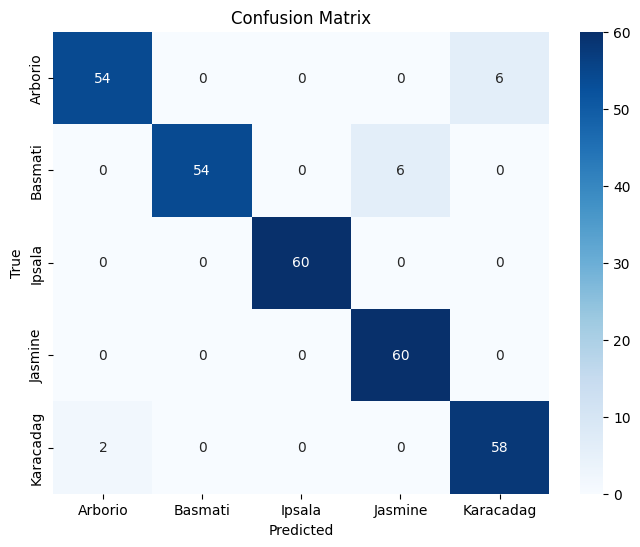

In [16]:
#Printing classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots training and validation loss & accuracy from a Keras model history object.

    Args:
        history: Keras History object from model.fit()
    """
    # Create subplots for Loss and Accuracy
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Loss Plot
    ax[0].plot(history.history['loss'], label='Training Loss', color='blue')
    ax[0].plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].legend()

    # Accuracy Plot
    ax[1].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].legend()

    # Show the plots
    plt.show()


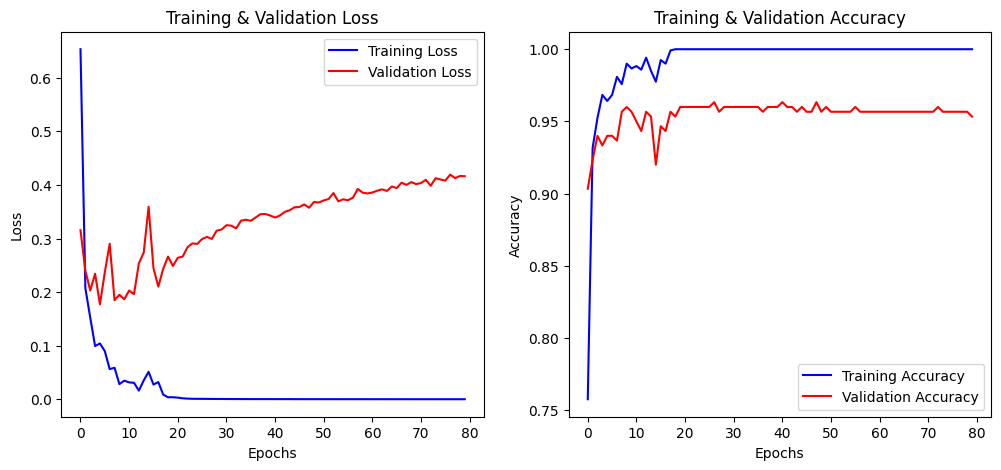

In [18]:
# Plot training performance
plot_training_history(history)